In [1]:
import json
import os

In [20]:
def load_files_with_path(root_dir, folder_name):
    results_dict = {}

    # Walking through the directory structure
    for root, dirs, files in os.walk(root_dir):
        # Check if 'gptj-final' is in the path
        # Split root, get the last element, and check if it is 'gptj-final'
        root_split = root.split('/')[-1]
        print(root_split)
        if folder_name != root_split:
            continue
    
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(root, file)
                x = root.split('/')[-2]  # Extract 'x' from the path
                y = os.path.splitext(file)[0]  # Extract 'y' from the file name
                # Extract number from 'y'
                y = y.split('_')[-1]

                # Load JSON data
                with open(file_path, 'r') as json_file:
                    data = json.load(json_file)

                # Adding to dictionary
                if x not in results_dict:
                    results_dict[x] = {}
                results_dict[x][y] = data

    return results_dict

loaded_data1 = load_files_with_path("results/", "gptj-final")
loaded_data2 = load_files_with_path("results/", "gptj-final2")
loaded_data3 = load_files_with_path("results/", "gptj-final3")
loaded_data4 = load_files_with_path("results/", "gptj-final4")
loaded_data5 = load_files_with_path("results/", "gptj-final5")

loaded_data4 # Displaying the loaded data structure


antonym
22_11_2023_15_55_27
28_11_2023_16_45_14
28_11_2023_16_51_40
28_11_2023_16_59_44
28_11_2023_17_14_08
28_11_2023_18_30_44
gptj-final
28_11_2023_21_02_39
gptj-final2
29_11_2023_00_06_27
gptj-final3
llama7B
29_11_2023_15_24_35
29_11_2023_16_12_24
29_11_2023_16_36_02
gptj-final4
29_11_2023_21_11_50
gptj-final5
capitalize
28_11_2023_18_48_22
gptj-final
gptj-final2
gptj-final3
llama7B
29_11_2023_15_27_49
gptj-final4
29_11_2023_21_31_10
gptj-final5
cosine-sims
present-past
21_11_2023_13_39_58
21_11_2023_13_54_30
21_11_2023_14_01_50
21_11_2023_14_07_28
21_11_2023_14_14_49
28_11_2023_19_37_49
gptj-final
gptj-final2
gptj-final3
llama7B
29_11_2023_15_36_57
gptj-final4
gptj-final5
singular-plural
21_11_2023_13_30_48
28_11_2023_19_43_55
gptj-final
gptj-final2
gptj-final3
llama7B
29_11_2023_15_39_14
gptj-final4
gptj-final5
country-capital
28_11_2023_18_58_02
gptj-final
gptj-final2
gptj-final3
llama7B
29_11_2023_15_30_20
gptj-final4
29_11_2023_21_41_55
gptj-final5
english-french
28_11_2023_19

{'antonym': {'77702': {'14': {'original': {'clean_topk': [[1,
       0.015337423312883436],
      [2, 0.12576687116564417],
      [3, 0.17484662576687116]],
     'clean_rank_list': [17,
      2,
      20,
      52,
      1,
      6,
      726,
      75,
      8143,
      1,
      20,
      126,
      7,
      23,
      2,
      2251,
      198,
      1,
      5248,
      287,
      1,
      23,
      66,
      13,
      50,
      448,
      26,
      12,
      7,
      3,
      1,
      33,
      2,
      7,
      1,
      126,
      66,
      0,
      417,
      273,
      4,
      2,
      63,
      39,
      55,
      4,
      169,
      8,
      1,
      25,
      19,
      547,
      3991,
      3,
      49,
      6,
      1,
      4,
      44,
      2793,
      1,
      14,
      1,
      125,
      620,
      110,
      2084,
      1,
      45,
      4,
      1,
      40,
      113,
      7,
      53,
      142,
      19,
      1,
      8007,
      81,
      11,
      12,
      

In [3]:
import pandas as pd

In [4]:
def dict_to_dataframe(data):
    # Create an empty list to store the rows
    rows = []

    # Iterate through the dictionary to extract data
    for task, seeds in data.items():
        for seed, layers in seeds.items():
            for layer, types in layers.items():
                for type_, info in types.items():
                    # Append a new row with the desired data
                    rows.append({
                        "task": task,
                        "seed": seed,
                        "layer": layer,
                        "type": type_,
                        "accuracy": info['intervention_topk'][0][1],
                    })

    # Convert the list of rows into a DataFrame
    df = pd.DataFrame(rows)

    return df

In [21]:
df1 = dict_to_dataframe(loaded_data1)
df2 = dict_to_dataframe(loaded_data2)
df3 = dict_to_dataframe(loaded_data3)
df4 = dict_to_dataframe(loaded_data4)
df5 = dict_to_dataframe(loaded_data5)
# Concatenate the DataFrames
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [6]:
df

,task,seed,layer,type,accuracy
0,antonym,87341,9,original,0.172185
1,antonym,87341,9,centred,0.112583
2,antonym,12150,9,original,0.205357
3,antonym,12150,9,centred,0.122024
4,antonym,12992,9,original,0.211180
...,...,...,...,...,...
535,english-french,53313,14,centred,0.054156
536,english-french,53313,15,original,0.036524
537,english-french,53313,15,centred,0.410579
538,english-french,53313,16,original,0.036524


In [22]:
# Order df by layer (integer version of layer)
df['layer'] = df['layer'].astype(int)

In [23]:
# If the type is 'centred', replace with 'mean-centred'
df['type'] = df['type'].apply(lambda x: 'mean-centred' if x == 'centred' else x)
# If the type is 'original', replace with 'uncentred'
df['type'] = df['type'].apply(lambda x: 'uncentred' if x == 'original' else x)

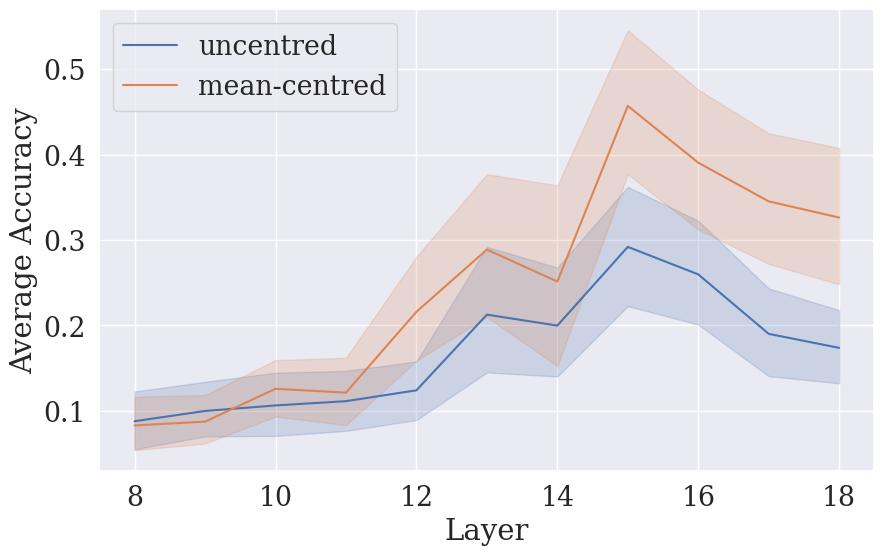

In [24]:
# Plot the mean accuracy for each layer, for each type
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.75)

plt.rcParams.update({
    'font.family':'serif',
    "text.usetex": False,
    'savefig.facecolor': 'white',
})

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the mean accuracy for each layer, for each type
sns.lineplot(data=df, x='layer', y='accuracy', hue='type')

# Set the title and axes labels
# plt.title('GPT-J Steered Accuracy')
plt.xlabel('Layer')
plt.ylabel('Average Accuracy')

# Set the legend inside the plot
plt.legend()

plt.savefig('results/imgs/gptj-steered-accuracy-more-layers.pdf', bbox_inches='tight')

# Display the plot
plt.show()

# Save the plot as a pdf


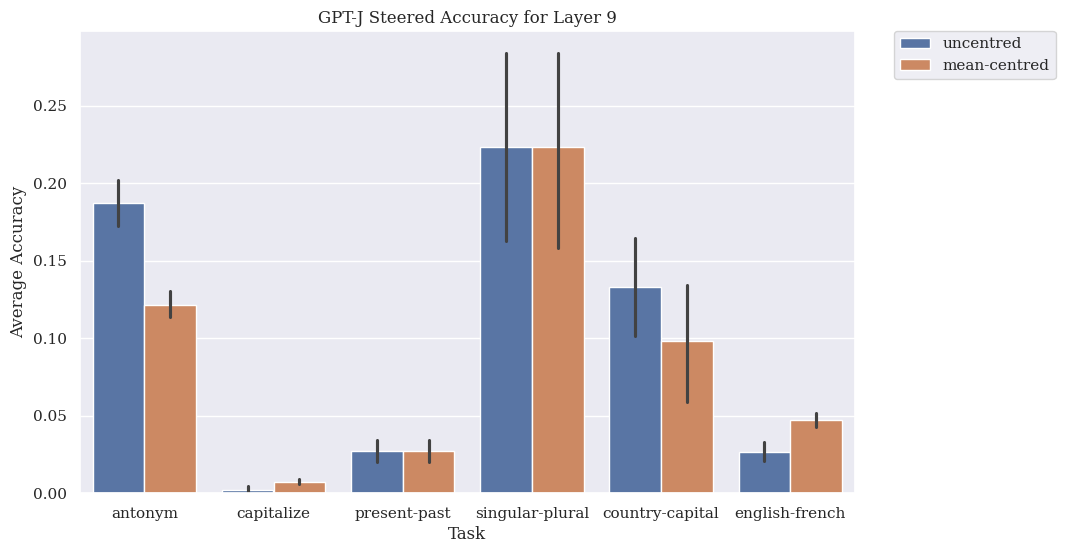

In [10]:
# For layer 9, plot the accuracy for each task, for each type
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the mean accuracy for each layer, for each type
sns.barplot(data=df[df['layer'] == 9], x='task', y='accuracy', hue='type')

# Set the title and axes labels
plt.title('GPT-J Steered Accuracy for Layer 9')
plt.xlabel('Task')
plt.ylabel('Average Accuracy')

# Set the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.show()

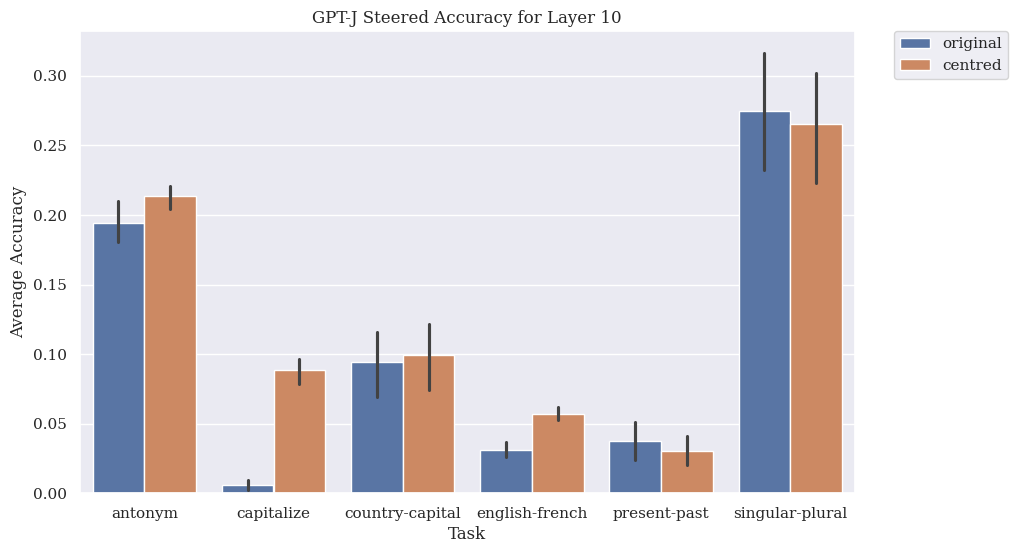

In [19]:
# For layer 10, plot the accuracy for each task, for each type
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the mean accuracy for each layer, for each type
sns.barplot(data=df[df['layer'] == 10], x='task', y='accuracy', hue='type')

# Set the title and axes labels
plt.title('GPT-J Steered Accuracy for Layer 10')
plt.xlabel('Task')
plt.ylabel('Average Accuracy')

# Set the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.show()

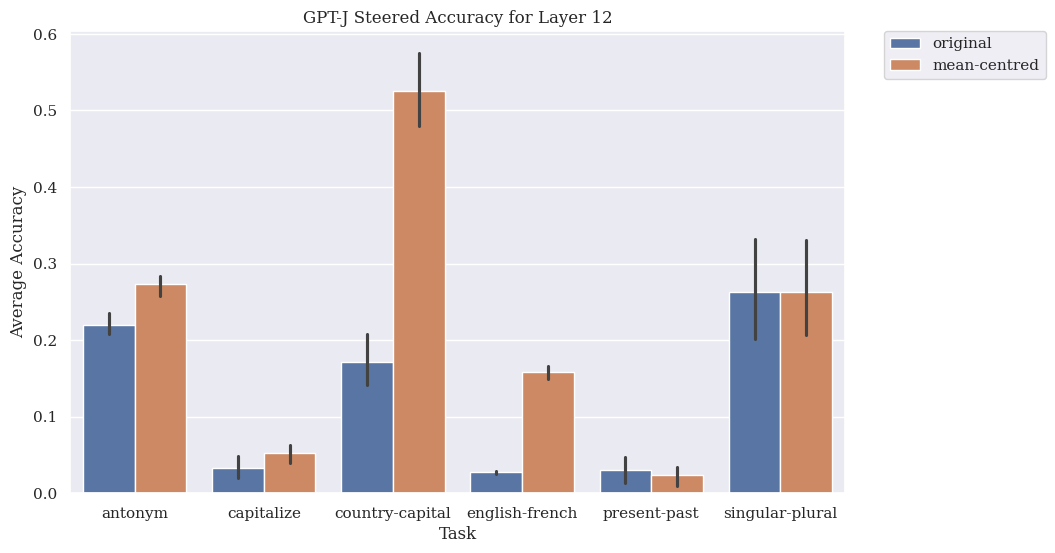

In [23]:
# For layer 12, plot the accuracy for each task, for each type
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the mean accuracy for each layer, for each type
sns.barplot(data=df[df['layer'] == 12], x='task', y='accuracy', hue='type')

# Set the title and axes labels
plt.title('GPT-J Steered Accuracy for Layer 12')
plt.xlabel('Task')
plt.ylabel('Average Accuracy')

# Set the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.show()

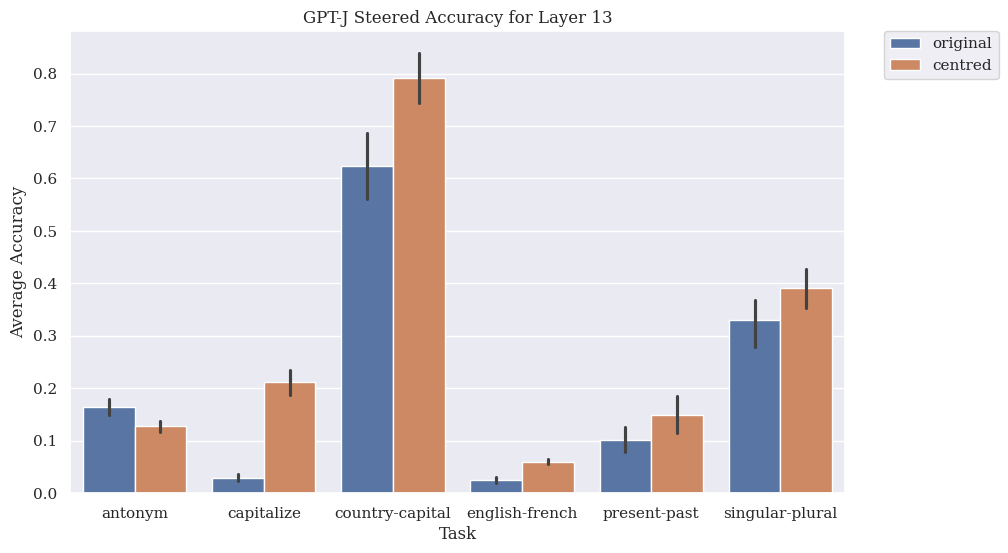

In [18]:
# For layer 13, plot the accuracy for each task, for each type
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the mean accuracy for each layer, for each type
sns.barplot(data=df[df['layer'] == 13], x='task', y='accuracy', hue='type')

# Set the title and axes labels
plt.title('GPT-J Steered Accuracy for Layer 13')
plt.xlabel('Task')
plt.ylabel('Average Accuracy')

# Set the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.show()

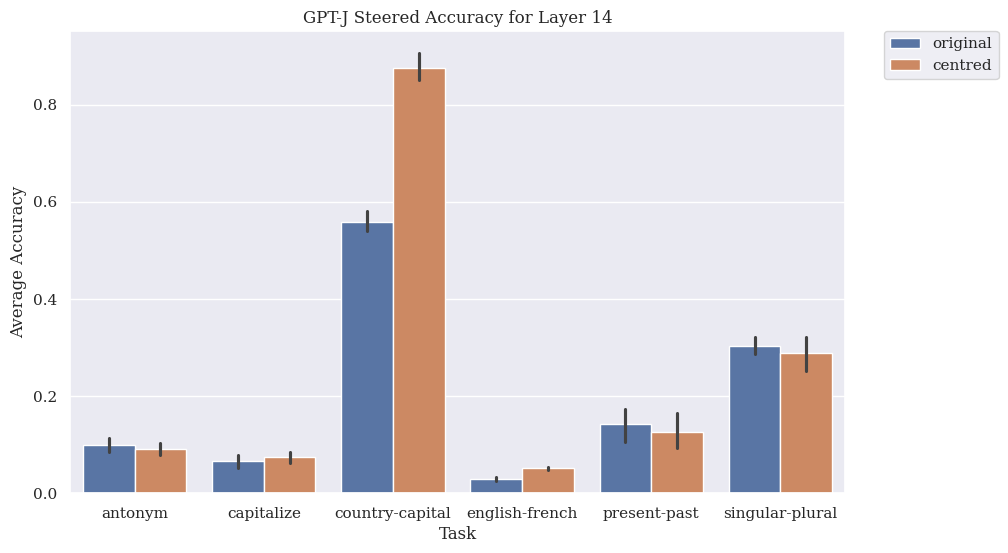

In [17]:
# For layer 14, plot the accuracy for each task, for each type
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the mean accuracy for each layer, for each type
sns.barplot(data=df[df['layer'] == 14], x='task', y='accuracy', hue='type')

# Set the title and axes labels
plt.title('GPT-J Steered Accuracy for Layer 14')
plt.xlabel('Task')
plt.ylabel('Average Accuracy')

# Set the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.show()

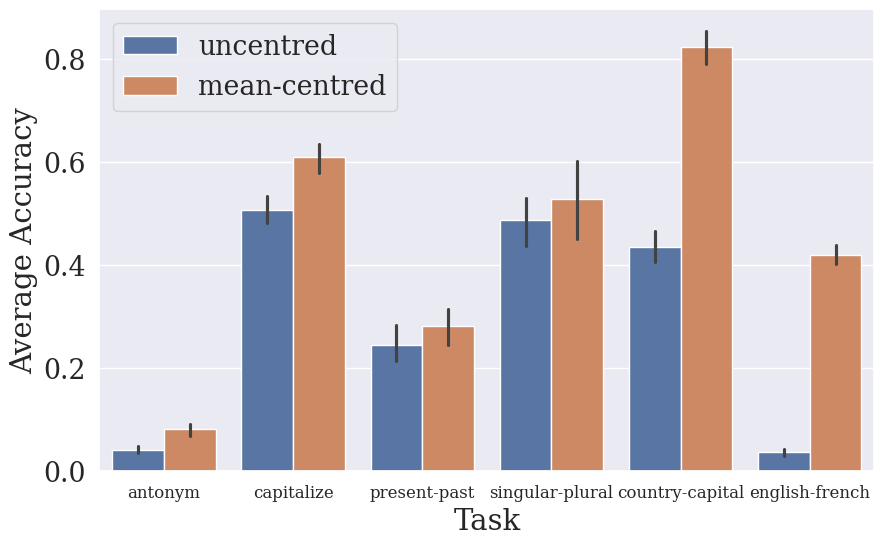

In [19]:
# For layer 15, plot the accuracy for each task, for each type
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the mean accuracy for each layer, for each type
sns.barplot(data=df[df['layer'] == 15], x='task', y='accuracy', hue='type')

# Set the title and axes labels
# Set the text for the x-axis to be smaller
plt.xlabel('Task')
plt.xticks(fontsize=12)
plt.ylabel('Average Accuracy')

plt.legend()

plt.savefig('results/imgs/gptj-steered-accuracy-layer15.pdf', bbox_inches='tight')

# Display the plot
plt.show()



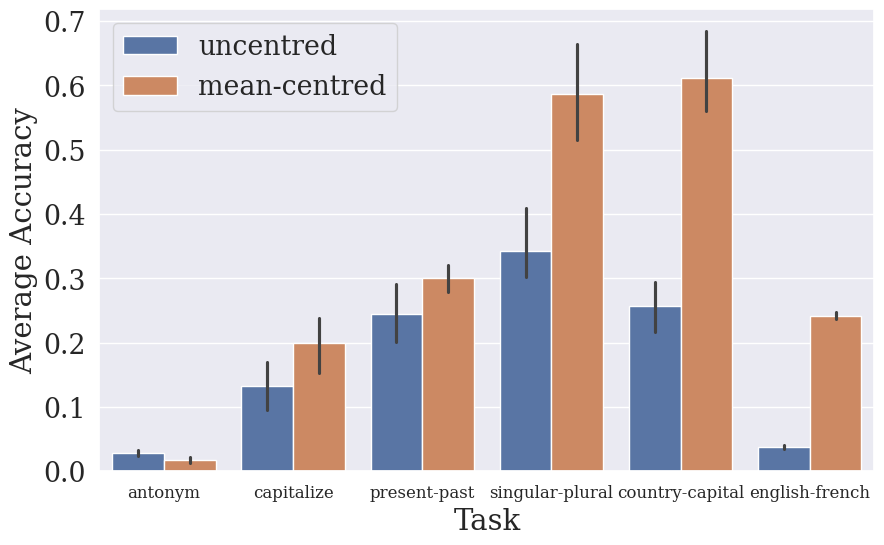

In [26]:
# For layer 18, plot the accuracy for each task, for each type
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the mean accuracy for each layer, for each type
sns.barplot(data=df[df['layer'] == 18], x='task', y='accuracy', hue='type')

# Set the title and axes labels
# Set the text for the x-axis to be smaller
plt.xlabel('Task')
plt.xticks(fontsize=12)
plt.ylabel('Average Accuracy')

plt.legend()

plt.savefig('results/imgs/gptj-steered-accuracy-layer18.pdf', bbox_inches='tight')

# Display the plot
plt.show()


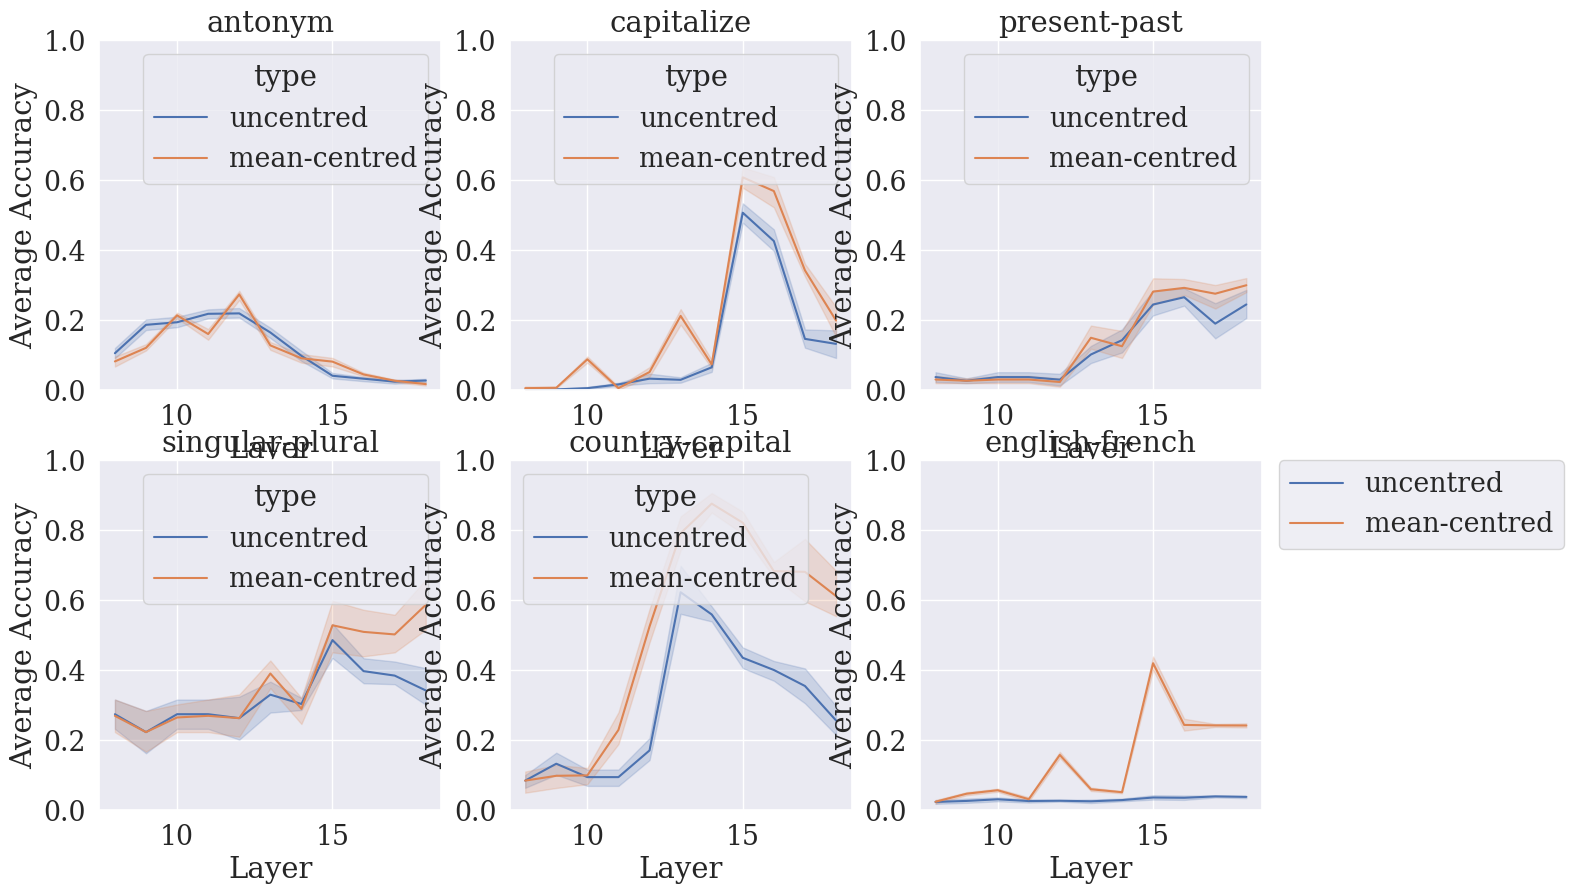

In [25]:
# Produce a line graph for accuracy vs. layer for each task
# Arrange 6 in 1 row
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes
axes = axes.flatten()

# Iterate through the tasks
for i, task in enumerate(df['task'].unique()):
    # Get the data for the task
    task_df = df[df['task'] == task]
    
    # Plot the mean accuracy for each layer, for each type
    sns.lineplot(ax=axes[i], data=task_df, x='layer', y='accuracy', hue='type')
    
    # Set the title and axes labels
    axes[i].set_title(task)
    axes[i].set_xlabel('Layer')
    axes[i].set_ylabel('Average Accuracy')
    # Set the range for the y-axis
    axes[i].set_ylim(0, 1)

# Set the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.show()